# **라쏘(Lasso) 회귀분석**
* **작성자:** (이형돈)
---
## **논문:  Regression Shrinkage and Selection via the Lasso(1995)**


보통 최소제곱법(OLS) 추정 결과는 정확하지 않는 경우가 있다. 첫 번째 이유는 OLS추정값은 편향은 낮지만 분산이 매우 커 예측 정확도가 떨어지는 것이다. 두번 째 이유는 OLS에 영향을 미치는 변수가 많아서 결과가 지나치게 복잡해지는 것이다.
부분집합 선택은 모델이 불안정할 수있고 릿지 회귀또한 변수들의 계수가 0이 되지는 않기 때문에 해석하기 쉬운 모델을 제공하지는 못한다. 따라서 이를 해결하기 위해  ROBERT TIBSHIRANI는 라쏘 회귀를 제안하였다. 이 방식은 모델을 안정화시키고 불필요한 변수의 계수를 0으로 만들어 모델을 간결하고 해석하기 쉽게 만들 수 있다.

$$
(\hat{\alpha}, \hat{\beta}) = \underset{\alpha, \beta}{\arg\min} \left\{ \sum_{i=1}^{N} (y_i - \alpha - \sum_{j=1}^{p} \beta_j x_{ij})^2 \right\} \quad \text{subject to} \quad \sum_{j=1}^{p} |\beta_j| \le t$$

라쏘 회귀분석은 위와 같은 수식으로 정의된다. 앞쪽의 arg min{}부분은 기존의 OLS와 같은 부분이다. 뒷 부분이 라쏘 회귀분석에서 추가되는 부분이고, 모든 계수의 절댓값을 모두 더한 값이 우리가 정한 값 $t$보다 작거나 같아야 한다는 제약 조건을 추가한 것이다. 여기서 $t$는 튜닝 파라미터라고 불리고, 모델의 제약강도를 조절하는 역할을 한다.

전립선 암 데이터를 활용하여 이론이 실제 데이터에 어떻게 적용되는지 확인할 수 있다. 데이터는 암의 부피,나이등 8개의 예측 변수로 이루어져 있다.



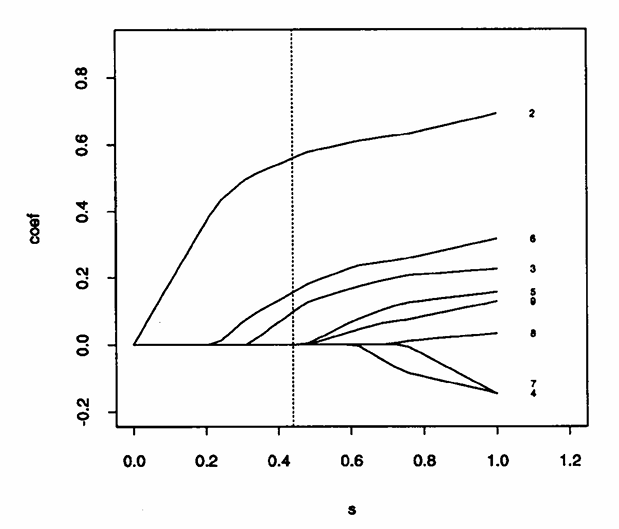

위의 그림은 라쏘 모델의 제약 강도가 변화함에 따라 계수가 어떻게 변하는지 보여준다. x축의 $s$는 제약 강도($t$)를 표준화한 값으로 0이면 가장 강력한 제약, 1이면 제약이 없는(OLS와 같은)상태를 나타낸다. $s$값이 증가함에 따라 각변수들의 영향력이 서서히 생기는 것을 확인할 수 있다. 이 예시는 $s$가 0.44인점을 최적값으로 선택하였다. 이때 암부피, 전립선 무게, 정낭 침범 3가지 변수만이 0이 아닌 값을 가지는데 이는 부분집합 선택 방법이 선택한 변수들과 동일했다.

데이터에 대해 예측을 가장 잘 하도록 만들어주는 최적의 $t$(또는$s$)값을 찾는 방법으로 3가지 주요 방법이 있다.

* 교차 검증(CV):가지고 있는 데이터를 k개로 나눈후 k-1가지 데이터로 모델은 만들고, 나머지 한가지로 시험하여 예측력을 평가한다. 이 과정을 k번 반복한 후, 평균 예측 오차가 가장 작았던 $t$값을 최적의 파라미터로 선택한다.

* 일반화 교차검증(GCV):데이터를 실제 나누는 것이 아닌, 통계적 근사치를 사용하여 교차검증의 예측 오차를 추정하는 방식이다. CV보다 계산이 빠르다는 장점이 있다.

* 슈타인의 비편향 위험 추정(SURE):모든 변수들이 모두 독립적이라는 상황을 가정한다. 이 가정하에 수식 하나만으로도 모델의 예측 오차를 추정할 수 있다. 가장 계산이 빠르지만, 변수들이 독립적이라는 가정이 현실 데이터와 차이를 유발할 수 있다.



지금까지의 라쏘 회귀는 오차를 줄이고 계수크기에 제한을 두는 최적화문제로 이해하였다. 반면에 라쏘의 해는 베이즈 통계학의 관점에서도 이해할 수 있다.
라쏘 추정값은 계수들이 독립적인 이중 지수 분포(0에서 더욱 뾰족하고, 꼬리가 더 두꺼움)를 따른다는 사전 확률(계수 값들의 분포에 대한 예상)을 가정하였을 때, 베이즈 사후 확률의 최빈값과 동일하다.

라쏘의 제약 조건은 변수가 p개일 때, 기하학적으로 $2^p$개의 면을 가진 다면체를 만든다. 따라서 변수가 조금만 많아지더라도 일반적인 방식으로는 풀기가 힘들기 때문에 특별한 알고리즘을 사용한다.
* 첫 번째 알고리즘은 필요한 제약만 순서대로 추가하는 것이다. 이 방법은 제약 조건을 한 번에 고려하는 것보다 효율적이다.
* 두 번째 알고리즘은 문제 자체를 바꾸는 것이다. 복잡한 기존 제약식을 표준화된 선형 제약식으로 바꾸게되면 변수가 2p개, 제약식은 2p+1개로 변수는 2배 늘지만 제약식의 개수가 줄어들면서 빠르고 안정적으로 풀 수 있다.

이러한 라쏘 회귀의 성능을 확인하고자 시뮬레이션을 통해 여러가지 다른 방법들과 비교한다. OLS,라쏘,릿지,가로트,부분집합 선택 총 다섯개의 방법이 참가하였다.
저자는 크게 3가지의 다른 상황을 가정하여 이 모델들을 테스트한다.

* 시나리오1:총 8개의 변수중 3개만 실제 영향력을 갖고, 나머지 5개는 아무련 영향력이 없을 라쏘는 압도적으로 1위를 차지하였다. 가로트와 부분집합 선택이 그 뒤를 따르고, 릿지는 OLS보다도 성능이 나빴다.
* 시나리오2:모든 변수가 조금씩 영향력을 갖는 경우, 릿지가 압도적으로 1위를 차지하였다. 라쏘는 OLS보다는 좋은 성능으로 2위를 차지하였다. 부분집합 선택과 가로트는 OLS보다도 성능이 나빴다.
* 시나리오3:총 8개의 변수 중 단 한개만 매우 큰 영향력이 있고 나머지는 계수가 0일 경우, 가로트와 부분집합 선택이 1등을 차지하고 라쏘가 그 뒤를 차지하며 릿지는 OLS보다도 성능이 나빴다.

시뮬레이션의 결과로 상황에 따라 적합한 모델이 다르다는 것을 알 수있다.
하지만 라쏘의 경우 어느시나리오에서도 꾸준히 좋은 성능을 보여주는 것이 주목할 만한 점이다.

---

참고문헌
* Tibshirani, R. (1996). Regression shrinkage and selection via the lasso. Journal of the Royal Statistical Society Series B: Statistical Methodology, 58(1), 267-288.